# Pymaceuticals Inc.
---

### Analysis

- As the dataframe grouped by Drug Regimen with Mean, Median, Variance, Standard Deviation, and Standard Error of Tumor Volume, we can see that Ketapril has the highest values among all the Drug Regimen. 

- According to the quantiles, outliners, and boxplot, we can tell that Infubinol treatment regimen is the only treatment among the four that has an outlier, which with 36.321346 Tumor Volume (mm3). And the boxplot also highlighted this outliner in a red circle. All other data we collected from the other three treatment regimen are withen the lower and upper bound, which is fist-quantile - 1.5 * IQR and third-quantile + 1.5 * IQR accordingly.

- Based on the correlation and regression section in this analysis, we can see for the Capomulin regimen, the result of linregress function from scipy stat with an extremely small p-value, 1.3225722434712404e-07, proofs that there's relationship between mouse weight and the average tumor volume.
The relationship between mouse weight and the average tumor volume is possitive. The fitted linear regression model has been combined as the red line with the scatter plot. The formula for the linear regression is 
$$ x = 0.9544396890241049 * Weight (g) + 21.552160532685008 $$   

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = study_results.merge(mouse_metadata, on='Mouse ID', how='left')
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(df['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = df[df.duplicated(subset=['Mouse ID', 'Timepoint']) == True]['Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df[df['Mouse ID'] == duplicate[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# df_cleaned = df.drop_duplicates(ignore_index=True)
df_cleaned = df[df['Mouse ID'] != duplicate[0]]
df_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(df_cleaned['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

df_summary_stat = df_cleaned.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median','var','std', 'sem']})
df_summary_stat.rename(columns={'mean':'Mean Tumor Volume', 
                                'median':'Median Tumor Volume', 
                                'var':'Tumor Volume Variance', 
                                'std':'Tumor Volume Std. Dev.', 
                                'sem':'Tumor Volume Std. Err.'}, inplace=True)
df_summary_stat

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.320930           50.446266             43.852013   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                            
             Tumor Volume Std. Dev. Tumor Volume Std. Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.622085               0.544332  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
df_cleaned.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median','var','std', 'sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

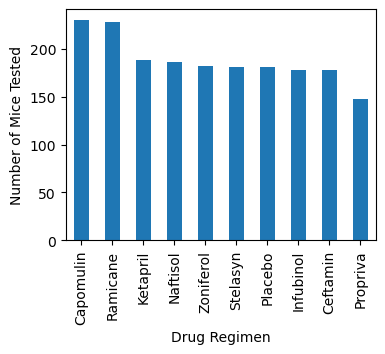

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
df_cleaned['Drug Regimen'].value_counts().plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Mice Tested', figsize=(4, 3))

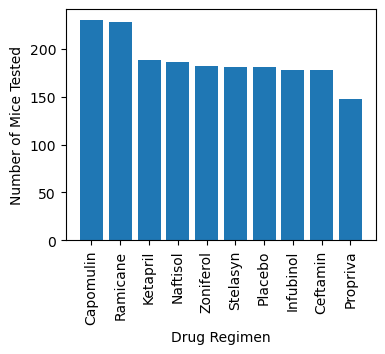

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
data = df_cleaned['Drug Regimen'].value_counts()
plt.figure(figsize=(4, 3))
plt.bar(data.index, data, align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.ticklabel_format()
plt.show()

<Axes: ylabel='Sex'>

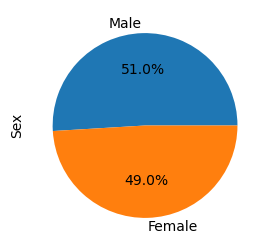

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df_cleaned['Sex'].value_counts().plot.pie(figsize=(3,3), autopct='%1.1f%%')

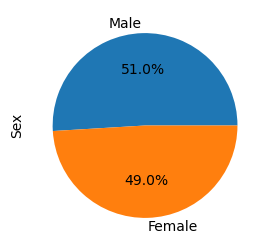

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = df_cleaned['Sex'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df_grouped = df.groupby(['Mouse ID'], as_index=False).agg({'Timepoint':'max'})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_merged = df_grouped.merge(df_cleaned, left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'])
df_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = df_merged.loc[(df_merged['Drug Regimen'] == i), 'Tumor Volume (mm3)']
    tumor_vol.append(final_tumor_volume)
    quantile = final_tumor_volume.quantile([.25, .5, .75])
    lower_q = quantile[0.25]
    upper_q = quantile[0.75]
    iqr = upper_q - lower_q
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5*iqr
    upper_bound = upper_q + 1.5*iqr
    outliner = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"{i}'s potential outliers: {outliner}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [15]:
quantile

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64

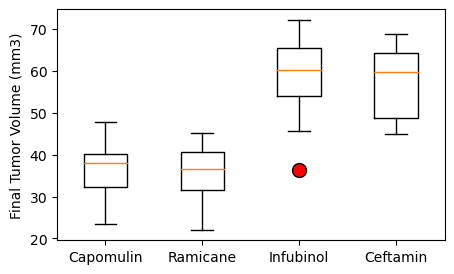

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(5, 3))
plt.boxplot(tumor_vol, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=10, linestyle='none'))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df_cleaned.loc[df_cleaned['Drug Regimen'] == 'Capomulin', 'Mouse ID'].unique()

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

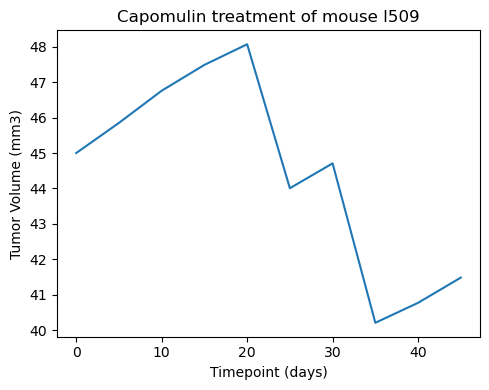

In [18]:
data = df_cleaned[df_cleaned['Mouse ID'] == 'l509']

plt.figure(figsize=(5, 4))
plt.plot(data['Timepoint'], data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

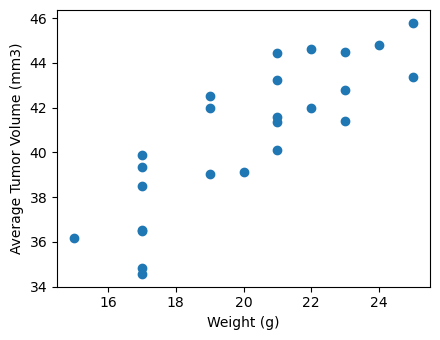

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df_capomulin = df_cleaned[df_cleaned['Drug Regimen'] == 'Capomulin']
data_avg_tumor = df_capomulin.groupby(['Mouse ID', 'Weight (g)'], as_index=False).agg({'Tumor Volume (mm3)': 'mean'})

plt.figure(figsize=(4.5, 3.5))
plt.scatter(data_avg_tumor['Weight (g)'], data_avg_tumor['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


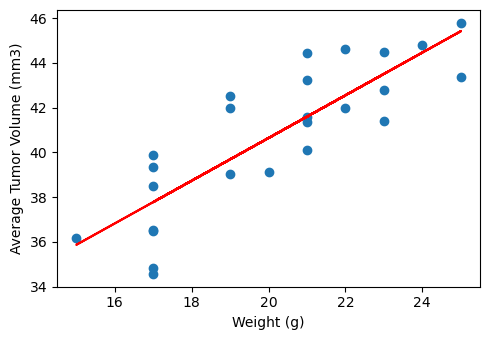

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, r_score, p_value, std_error = st.linregress(data_avg_tumor['Weight (g)'], data_avg_tumor['Tumor Volume (mm3)'])
fit = intercept + slope * data_avg_tumor['Weight (g)']
print(f'The correlation between mouse weight and the average tumor volume is {round(r_score, 2)}')

plt.figure(figsize=(5, 3.5))
plt.scatter(data_avg_tumor['Weight (g)'], data_avg_tumor['Tumor Volume (mm3)'])
plt.plot(data_avg_tumor['Weight (g)'], fit, color='r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

In [21]:
print(slope, intercept, r_score, p_value, std_error)

0.9544396890241049 21.552160532685008 0.8419363424694721 1.3225722434712404e-07 0.12754359033201323
